In [16]:
# primero importamos las librerias, que utilizaremos.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score


Creamos los data frames en los que trabajaremos y realizaremos pruebas.

In [17]:

df_test =pd.read_parquet (r'C:\Users\cfari\OneDrive\Escritorio\Datathon\test.parquet')
df_train= pd.read_parquet (r'C:\Users\cfari\OneDrive\Escritorio\Datathon\train.parquet')

Reviso las columnas y primeras filas del data frame.

In [18]:
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


Verifico si en el data frame existen valores nulos 

In [20]:
df_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Lo siguente es agregar la columna 'category_price' en la cual especificamos si el precio corresponde a categoria low, medium, high.

In [21]:
df_train ['category_price'] = df_train['price'].apply(lambda x: 'low' if x <= 999 else ('medium' if x <= 1999 else 'high'))

df_train

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,medium
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,medium
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,7050982281,https://evansville.craigslist.org/apa/d/evansv...,evansville,https://evansville.craigslist.org,672,apartment,660,1,1.0,1,...,0,0,laundry on site,None,https://images.craigslist.org/00x0x_9oaHKZ8Ilp...,"The pool, the office, the 24-hour on-site laun...",37.9591,-87.5293,in,low
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.0370,ca,high
346476,7048268235,https://columbia.craigslist.org/apa/d/columbia...,columbia,https://columbia.craigslist.org,1014,apartment,1104,2,2.0,1,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_dpNWqzYhGK...,Tucked into the rolling landscape of Southeast...,33.9659,-80.9355,sc,medium
346477,7026721229,https://nd.craigslist.org/apa/d/minot-open-con...,north dakota,https://nd.craigslist.org,935,apartment,1050,2,2.0,0,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00Z0Z_65g6Cty1RX...,Enjoy living at Southwood Apartments! Located ...,48.1995,-101.2800,nd,low


Verifico las columnas de DF, para verificar si quedo la columna agregada con sus categorias cprrespondientes.

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Verifico la existencia de valores nuilops en la columna nueva

In [23]:
df_train.category_price.unique()

array(['medium', 'low', 'high'], dtype=object)

In [24]:
df_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
category_price                  0
dtype: int64

<AxesSubplot: xlabel='category_price', ylabel='count'>

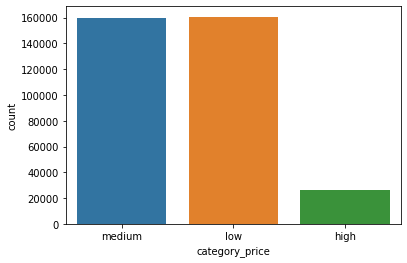

In [25]:
sns.countplot(x='category_price', data= df_train)

Por lo que podemos ver los precios "High" representan el porcentaje mas bajo, mientras que los medium y los low estan parejos de acuerdo a lo que muestra el grafico.
Pero para nuestro modelo necesitamos solo dos condiciones de acuerdo a lo solicitado.

In [26]:

conditions = [
    (df_train['price'] >= 0) & (df_train['price'] <= 999),
    (df_train['price'] >= 1000)]
choices = ['1', '0']
df_train['category_price'] = np.select(conditions, choices).astype(int)
df_train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az,0
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1


<AxesSubplot: xlabel='category_price', ylabel='count'>

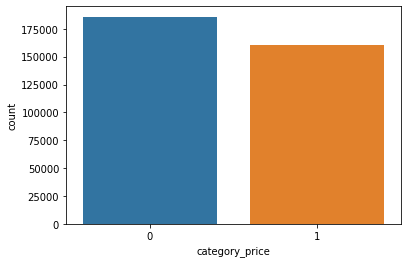

In [28]:
sns.countplot(x='category_price', data= df_train)

Ahora vemos que los low quedaron solos y los haigh se agregron a los medium, quedando balanceados en dos condiciones medium o high 0; y low 1.

Recorremos el DF para verificar la existencia de registros duplicados 

In [29]:
len(df_train)-len(df_train.drop_duplicates())

0

In [30]:
df_train.shape

(346479, 23)

Se detectan valores duplicados en el DF con el mismo precio en la mayoria y el mismo URL, para poder eliminar los repetidos utilizamos la columna URL ya que no cambia por lo que es la mas confiable para eliminar los duplicados.

In [31]:
#Al recorrer el DF con la funcion len podemos ver una gran cantidad de valores repetidos en la columna "image_url"
len(df_train['image_url'])-len(df_train['image_url'].drop_duplicates())

178233

In [32]:
# Buscamos visualizar un pequeño porcentaje de la poblacion de duplicados
df = df_train.loc[df_train['image_url'].duplicated(keep=False),'image_url']
df
df = df.groupby(df).apply(lambda x: tuple(x.index)).tolist()
df[24]

(66499, 70514, 173295, 215379, 309342, 331892)

Al ver la columna precio nos damos cuenta que este tiende al alza, esto puede deberse a la inflacion que se experimneta actualmente a nivel mundial y en especial en USA, o a un aumento en la demanda local de inmuebles.

In [33]:
df_train.loc[[66499,70514, 173295,215379,309342,331892],['price','image_url','description']]

,price,image_url,description
66499,1164,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...
70514,1284,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...
173295,1284,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...
215379,1284,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...
309342,1284,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...
331892,1284,https://images.craigslist.org/00000_204WDl9WiP...,Welcome to Riverview Apartments. Please call f...


In [34]:
# Eliminamos las publicaciones duplicadas y podemos ver que se eliminaron mas de la mitad de los registros
df_train.drop_duplicates(subset='image_url', inplace=True)
df_train.shape

(168246, 23)

<AxesSubplot: xlabel='category_price', ylabel='count'>

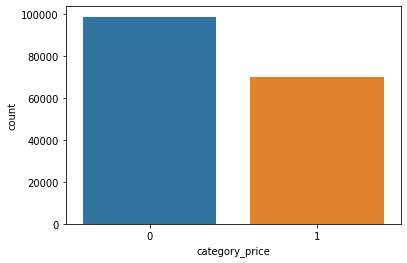

In [35]:
# Revisamos la distribucion en el grafico
sns.countplot(x='category_price', data=df_train)

A continuacion buscaremos valores nulos en nuetro DF

In [36]:
df_train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_price
count,1.682460e+05,1.682460e+05,1.682460e+05,168246.000000,168246.000000,168246.000000,168246.000000,168246.000000,168246.000000,168246.000000,168246.000000,167328.000000,167328.000000,168246.000000
mean,7.041582e+09,1.823485e+04,1.130897e+03,1.984344,1.493438,0.677591,0.656836,0.679374,0.080786,0.016630,0.056958,37.686822,-94.297691,0.414209
std,9.130467e+06,6.749396e+06,2.141155e+04,4.460110,0.647693,0.467400,0.474767,0.466719,0.272508,0.127883,0.231764,5.831513,17.412971,0.492586
min,7.004042e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000,0.000000
25%,7.036552e+09,8.450000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.736800,-105.125000,0.000000
50%,7.044526e+09,1.100000e+03,9.600000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.250300,-89.275650,0.000000
75%,7.049008e+09,1.500000e+03,1.200000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.683200,-81.264900,1.000000
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000,1.000000


Nos damos cuenta que en la columna long hay valores en negativo.

In [37]:
# Revisamos existencia de valores nulos
df_train["long"].isnull().sum()

918

Los valores nulos se dejan como unknown (desconocidos), para no perder informacion de clientes que pueden ser importantes.

In [38]:
df_train['long'].fillna('unknown', inplace= True)
df_train

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id,0
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.78,co,0
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,0
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.056,az,0
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346460,7046734925,https://miami.craigslist.org/brw/apa/d/fort-la...,south florida,https://miami.craigslist.org,1565,apartment,720,1,1.0,0,...,0,0,None,None,https://images.craigslist.org/00q0q_eqjRAloITz...,Come Home to Bell at Plantation Apartments in ...,26.1467,-80.2433,fl,0
346462,7031598723,https://dayton.craigslist.org/apa/d/dayton-dec...,dayton / springfield,https://dayton.craigslist.org,479,apartment,562,1,1.0,1,...,0,0,laundry on site,off-street parking,https://images.craigslist.org/00s0s_8MWbqu0lvf...,Avalon Place Apartments & Townhomes 2196 Rockd...,39.7824,-84.0271,oh,1
346466,7045689575,https://boston.craigslist.org/gbs/apa/d/brookl...,boston,https://boston.craigslist.org,3155,apartment,896,1,1.0,0,...,0,0,w/d in unit,None,https://images.craigslist.org/00P0P_egXeeJ2jUR...,PROPERTY INFO ID: 184600979Rent: 3155 / MonthB...,42.3431,-71.123,ma,0
346475,7049418251,https://sandiego.craigslist.org/ssd/apa/d/chul...,san diego,https://sandiego.craigslist.org,2122,apartment,1099,2,2.0,1,...,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00O0O_6QsU4p5WMh...,Seize your chance to live in our beautiful apa...,32.6279,-117.037,ca,0


In [39]:
# Importamos el set de entrenamiento y testeo provisto con los datos ya limpios

df_test_henry = pd.read_csv(r'C:\Users\cfari\OneDrive\Escritorio\Dataton_cfg_2023\df_test.csv')
df_train_henry = pd.read_csv(r'C:\Users\cfari\OneDrive\Escritorio\Dataton_cfg_2023\df_train.csv')
x= df_train_henry[['price', 'type', 'category_price']].values
y= df_test_henry.values

print(x)
print(y)

[[1350    3    0]
 [1115    2    0]
 [1129    2    0]
 ...
 [3155    2    0]
 [2122    2    0]
 [1300    2    0]]
[[0 7037609789
  'https://annarbor.craigslist.org/apa/d/wixom-home-for-the-holidays/7037609789.html'
  ... 42.5333 -83.5763 'mi']
 [1 7032406876
  'https://vermont.craigslist.org/apa/d/randolph-large-2-bdrm-incl-heat/7032406876.html'
  ... 43.9393 -72.5538 'vt']
 [2 7037022682
  'https://annarbor.craigslist.org/apa/d/ann-arbor-dog-park-disposal-pantry/7037022682.html'
  ... 42.2492 -83.7712 'mi']
 ...
 [38495 7048966175
  'https://tampa.craigslist.org/hil/apa/d/brandon-1-month-free-rent-99-to-apply/7048966175.html'
  ... 27.8971 -82.3387 'fl']
 [38496 7044693740
  'https://mohave.craigslist.org/apa/d/fort-mohave-house-for-rent-3bed-2-bath/7044693740.html'
  ... 35.0052 -114.569 'az']
 [38497 7048475278
  'https://atlanta.craigslist.org/wat/apa/d/atlanta-dishwasher-garage-controlled/7048475278.html'
  ... 33.8236 -84.3214 'ga']]


In [40]:
# Iniciamos el modelo de KMeans, con la cantidad de clusters solicitada por Henry
model = KMeans(n_clusters=3)

In [41]:

# Entrenamos el modelo sin escalar los datos sobre el set de entrenamiento
model.fit(x)


c:\Users\cfari\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
# Efectuamos las predicciones sobre el set
y_prediccion = model.predict(x)
y_prediccion

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# Generamos el archivo csv con las predicciones para la entrega
pd.DataFrame(y_prediccion).to_csv('cfg.csv', index=False, header = False)